In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8

In [2]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


### 1. Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
# Смортим пропуски.
df[df['dob'].isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [5]:
# Значение всего одно и мы не сможем адекватно его аменить, так что удаляем.
df = df[~df['dob'].isna()]

In [6]:
# Смотрим оновные показатели роста
print(df['height'].mode()[0])
print(df['height'].mean())
print(df['height'].median())
print(np.std(df['height'], ddof=1))
print(df['height'].value_counts().head(5))

1.8
1.7662821199143461
1.76
0.11271869117624643
1.80    580
1.70    579
1.75    484
1.78    453
1.73    424
Name: height, dtype: int64


In [7]:
# и заменим медианой.
df['height'] = df['height'].fillna(df['height'].median())

In [8]:
# тоже сделаем с весом, но их пропусков намного больше
print(df['weight'].mode()[0])
print(df['weight'].mean())
print(df['weight'].median())
print(np.std(df['weight'], ddof=1))
print(df['weight'].value_counts().head(5))

70.0
72.06820479823513
70.0
16.17733414697665
70.0    482
60.0    387
65.0    382
75.0    342
58.0    336
Name: weight, dtype: int64


In [9]:
df['weight'] = df['weight'].fillna(df['weight'].median())

In [10]:
print(df['weight'].mode()[0])
print(df['weight'].mean())
print(df['weight'].median())
print(np.std(df['weight'], ddof=1))
print(df['weight'].value_counts().head(5))

70.0
71.95024703129063
70.0
15.71651340145976
70.0    1140
60.0     387
65.0     382
75.0     342
58.0     336
Name: weight, dtype: int64


b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [11]:
# очень большое количество стран участников. Уберем их
df.nationality.unique()

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'IOA', 'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG',
       'DEN', 'NED', 'DJI', 'SEN', 'CMR', 'ITA', 'NIG', 'SWE', 'GHA',
       'AFG', 'AZE', 'KSA', 'BAN', 'NGR', 'RUS', 'IND', 'HUN', 'KAZ',
       'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE', 'SEY', 'GAM', 'LTU',
       'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ARG', 'PUR', 'FRA', 'RWA',
       'TOG', 'MDV', 'TUN', 'ISR', 'LAT', 'JOR', 'MAS', 'LIB', 'LBA',
       'PLE', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN', 'MEX',
       'GRE', 'IRL', 'JAM', 'SUI', 'BAR', 'HON', 'ANG', 'GER', 'COL',
       'URU', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR', 'BLR', 'SMR', 'COK',
       'SAM', 'AUT', 'BEL', 'KEN', 'SVK', 'POR', 'ECU', 'UAE', 'NAM',
       'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER', 'TAN', 'FIJ', 'GUI',
       'NOR', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA', 'MAW',
       'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM', 'TTO',
       'CRC', 'BOL',

In [12]:
df.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['sport'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [15]:
df['income'] = pd.Series(data=le.transform(df['sex']))

In [16]:
df['income'].fillna(1)

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
11533    0.0
11534    1.0
11535    1.0
11536    1.0
11537    1.0
Name: income, Length: 11537, dtype: float64

In [17]:
df.drop(columns=['id', 'name', 'dob', 'sex', 'nationality'], inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11536 entries, 0 to 11536
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   height                   11536 non-null  float64
 1   weight                   11536 non-null  float64
 2   gold                     11536 non-null  int64  
 3   silver                   11536 non-null  int64  
 4   bronze                   11536 non-null  int64  
 5   sport_aquatics           11536 non-null  uint8  
 6   sport_archery            11536 non-null  uint8  
 7   sport_athletics          11536 non-null  uint8  
 8   sport_badminton          11536 non-null  uint8  
 9   sport_basketball         11536 non-null  uint8  
 10  sport_boxing             11536 non-null  uint8  
 11  sport_canoe              11536 non-null  uint8  
 12  sport_cycling            11536 non-null  uint8  
 13  sport_equestrian         11536 non-null  uint8  
 14  sport_fencing         

### 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [20]:
# Задаем Х и у
X = df.drop(columns='income')
y = df['income']

In [21]:
# Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [22]:
# Обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

D:\DataSci\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

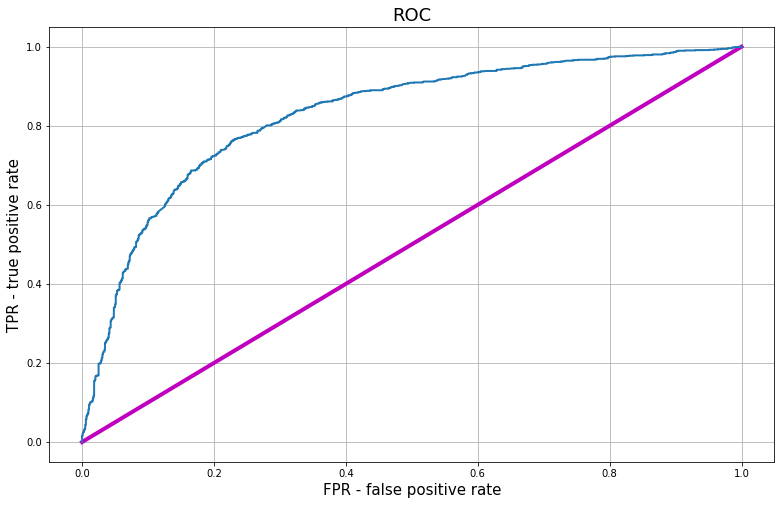

In [111]:
plt.plot([0, 1], [0, 1], c='m', linewidth= 4)
plt.plot(fpr, tpr, linewidth= 2)

plt.title('ROC', fontsize=18)
plt.xlabel('FPR - false positive rate', fontsize=15)
plt.ylabel('TPR - true positive rate', fontsize=15)
plt.grid()

plt.show()

### 4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.


In [25]:
roc_auc_score(y_test, predictions[:, 1])

0.82856952095822

### 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.


In [79]:
thres_1 = np.arange(0, 1, 0.01)

fpr_1 = []
tpr_1 = []
precision = []
recall = []

for thres in thres_1:
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0
    for predicted, real in zip(predictions[:, 1], y_test):
        if predicted >= thres:
            predict = 1
        else:
            predict = 0

        if predict == 1:
            if real == 1:
                tp += 1
            else:
                fp += 1

        else:
            if real == 1:
                fn += 1
            else:
                tn += 1
    
    tpr_ = tp / (tp + fn)
    fpr_ = fp / (fp + tn)
    precis = tp / (tp + fp)
    rec = tpr_
    
    tpr_1.append(tpr_)
    fpr_1.append(fpr_)
    precision.append(precis)
    recall.append(rec)

### 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.


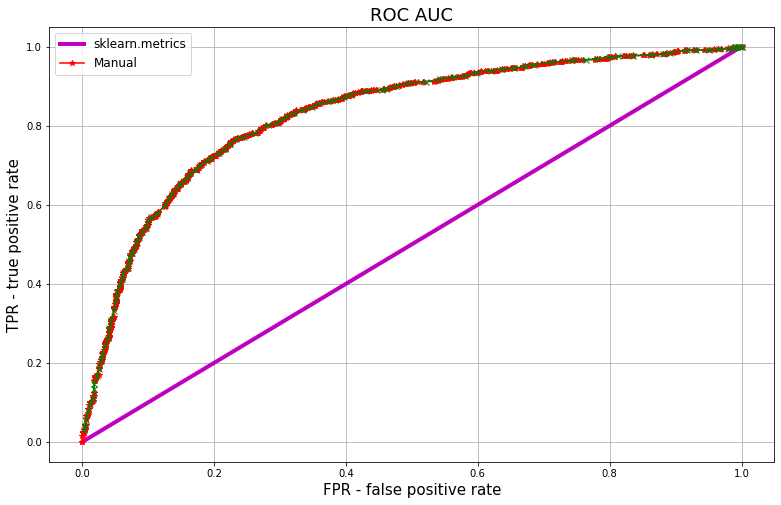

In [108]:
plt.plot([0, 1], [0, 1], c='m', linewidth= 4)
plt.plot(fpr, tpr, c='r', marker='*')
plt.plot(fpr_1, tpr_1, c='g', marker='x')

plt.title('ROC AUC', fontsize=18)
plt.xlabel('FPR - false positive rate', fontsize=15)
plt.ylabel('TPR - true positive rate', fontsize=15)
plt.legend(['sklearn.metrics', 'Manual'], fontsize = 12)
plt.grid()

plt.show()

### 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.


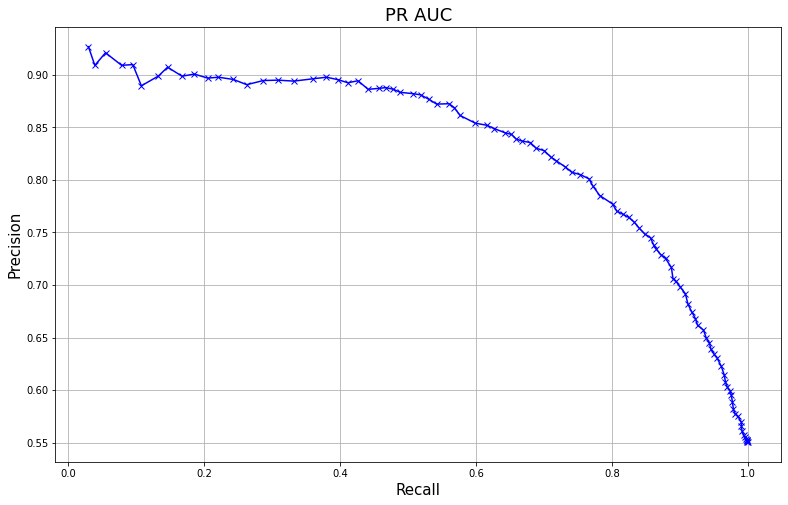

In [82]:
plt.plot(recall, precision, c='b', marker='x')

plt.title('PR AUC', fontsize=18)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.grid()

plt.show()

### Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [88]:
roc_auc_score(y_test, predictions[:, 1])

0.82856952095822

In [96]:
print(f'Ручной расчет ROC-AUC метрики, составил: {np.abs(np.trapz(tpr_1, fpr_1))}')

Ручной расчет ROC-AUC метрики, составил: 0.82848644223525


### 9. Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?



Чем ROC кривая выше диагонали (0;0),(1;1) и "горб" стремится к точке (0;1), тем модель лучше.
Модель неплохая, но видимо нужно было поиграть с признаками в X, чтобы было меньше шума.

b. *может ли ROC-кривая проходить ниже диагонали?

Нет, не может